# Image Processing
This Notebook is used for filtering, splitting and tiling. A Notebook is used to help visualise as you are processing

In [1]:
from utils.folder_structurer import FolderStructurer
from utils.filterer import ImageFilterer
from utils.image_tiler import ImageTiler
from utils.file_splitter import DatasetSplitter
from utils.neg_remover import NegRemover

In [2]:
name = "amag100"

input_path = "/media/java/RRAP03/data/exported_from_cvat/amag100"
output_path = "/media/java/RRAP03/data/outputs"

## Folder Format
First we need to structure the format ready for training after we have exported the labelled images from cvat.

In [3]:
exported_to_yolo_path = f"{output_path}/cvat2yolo/{name}"

structurer = FolderStructurer(input_path, exported_to_yolo_path)

In [4]:
structurer.visualize_input_structure()


Input Folder Structure:
amag100/
└── exported100/
    ├── data/
    │   ├── images/
    │   │   └── Train/
    │   └── labels/
    │       └── Train/
    ├── Train.txt
    └── data.yaml


In [5]:
is_valid = structurer.validate_input()

Validating dataset: exported100
✓ exported100 structure is valid

Validation summary:
  - Valid datasets: 1
  - Invalid datasets: 0


In [6]:
structurer.convert()


Converting 1 datasets...


Processing dataset: exported100:   0%|          | 0/1 [00:00<?, ?dataset/s]

Collected classes from exported100: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


Processing dataset: exported100: 100%|██████████| 1/1 [00:13<00:00, 13.69s/dataset]

Dataset exported100: 100 images, 100 labels

Successfully created training structure at /media/java/RRAP03/data/outputs/cvat2yolo/amag100
Created cgras_data.yaml with 4 classes and 1 datasets
Class mapping preserved: {0: 'alive', 1: 'dead', 2: 'mask_live', 3: 'mask_dead'}


True

In [7]:
structurer.visualize_output_structure()


Output Folder Structure:
amag100/
├── datasets/
│   └── exported100/
│       └── data/
│           ├── images/
│           └── labels/
└── cgras_data.yaml


## Filtering
First it is important to filter out any issues that still may be contained in the labels/ datasets.

In [8]:
# yaml_path = structurer.yaml_path
yaml_path = "/home/java/hpc-home/data/outputs/cvat2yolo/amag100/cgras_data.yaml"
filtered_path = f"{output_path}/filtered/{name}"

In [9]:
filterer = ImageFilterer(yaml_path, filtered_path)

Found 1 dataset paths in the YAML file


In [10]:
filterer.analyze_dataset_areas()

Analyzing 100 images in exported100...


Processing exported100: 100%|██████████| 100/100 [00:24<00:00,  4.02files/s]

Found 23083 labels in exported100
Total labels analyzed: 23083


[1751.050706449896,
 1077.563655078411,
 1860.153582662344,
 795.9714457802474,
 2144.491997510195,
 1650.5460444688797,
 1794.9730005562305,
 1622.032824344933,
 648.6483514979482,
 1964.414808601141,
 1641.5947307646275,
 2003.0423600524664,
 1866.4792912751436,
 1690.4874776303768,
 2010.0019027888775,
 1771.0592981427908,
 1997.1358221322298,
 1845.4755411595106,
 2114.050305724144,
 1744.451192934066,
 1711.5916979014874,
 1172.5094938278198,
 1864.407703101635,
 1401.3845033049583,
 1254.6029751300812,
 1304.4647973254323,
 1794.449247315526,
 1979.0227118879557,
 958.5019240416586,
 2017.900211662054,
 1789.13939550519,
 1431.9898963421583,
 9.014590337872505,
 1106.6129883527756,
 2375.0951063632965,
 1826.4759219884872,
 1875.4787497520447,
 1597.459159232676,
 1582.0817122161388,
 1645.4805744886398,
 1813.4750178009272,
 1674.1051933020353,
 925.5722453594208,
 905.1073348857462,
 943.2221979498863,
 1841.0631722211838,
 1904.9073111712933,
 2256.4153753370047,
 1726.0964272

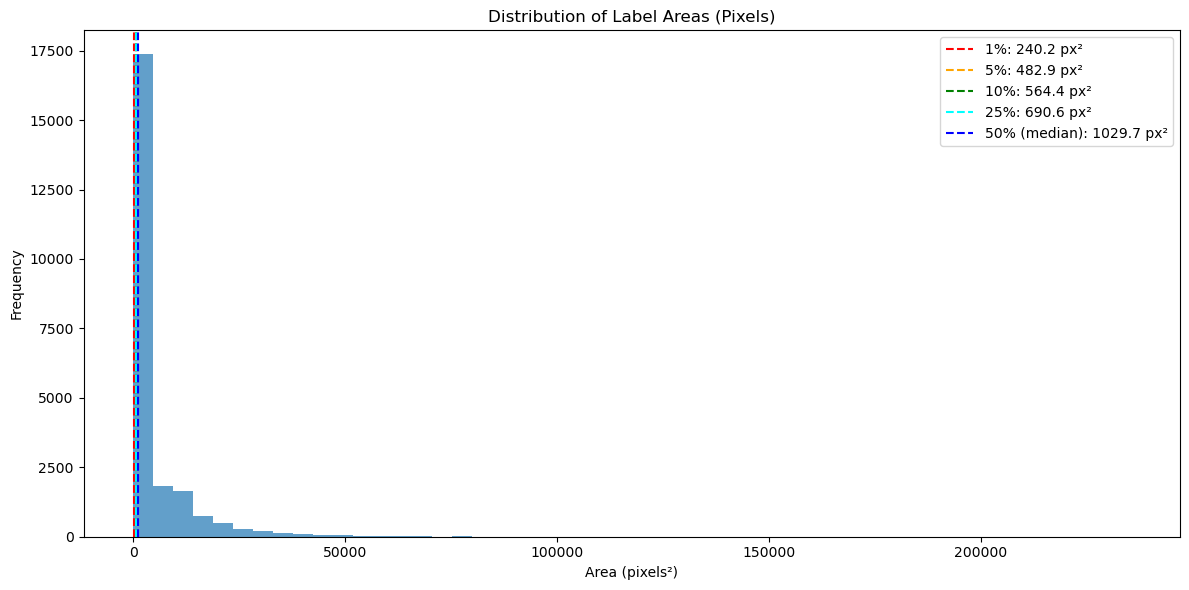

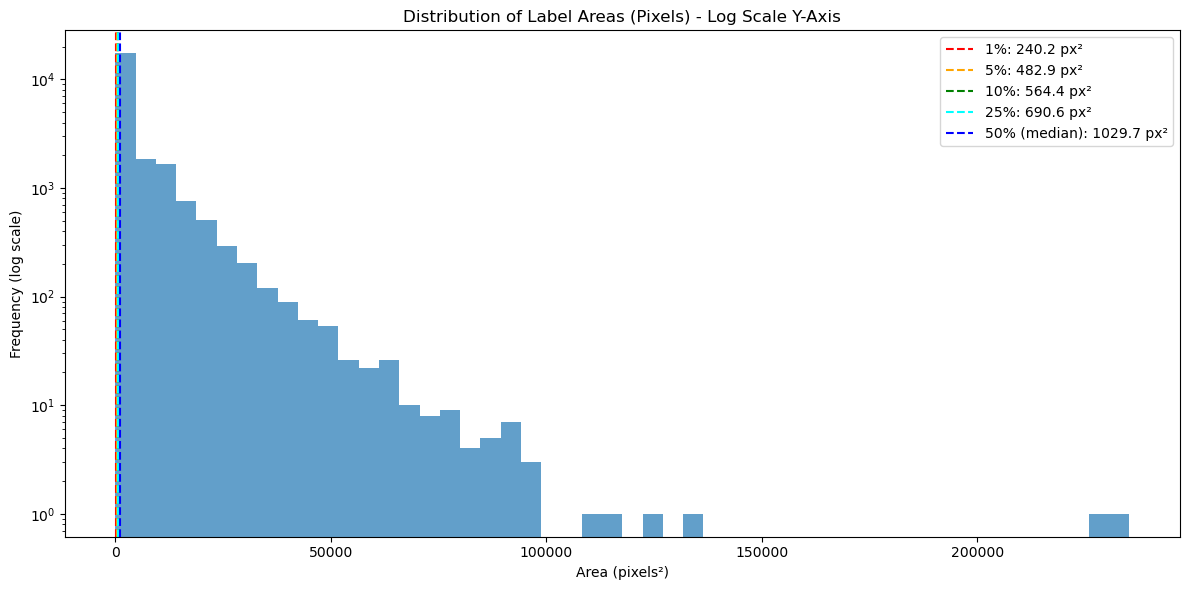

Label area statistics (in pixels²):
  - Count: 23083
  - Min: 3.5
  - Max: 235255.1
  - Mean: 4718.9
  - Median: 1029.7
  - 1%: 240.2
  - 5%: 482.9
  - 10%: 564.4
  - 25%: 690.6
  - 50% (median): 1029.7


In [11]:
filterer.plot_area_histogram()

Filtering to show only areas <= 1000 pixels² (11235/23083 labels, 48.7%)


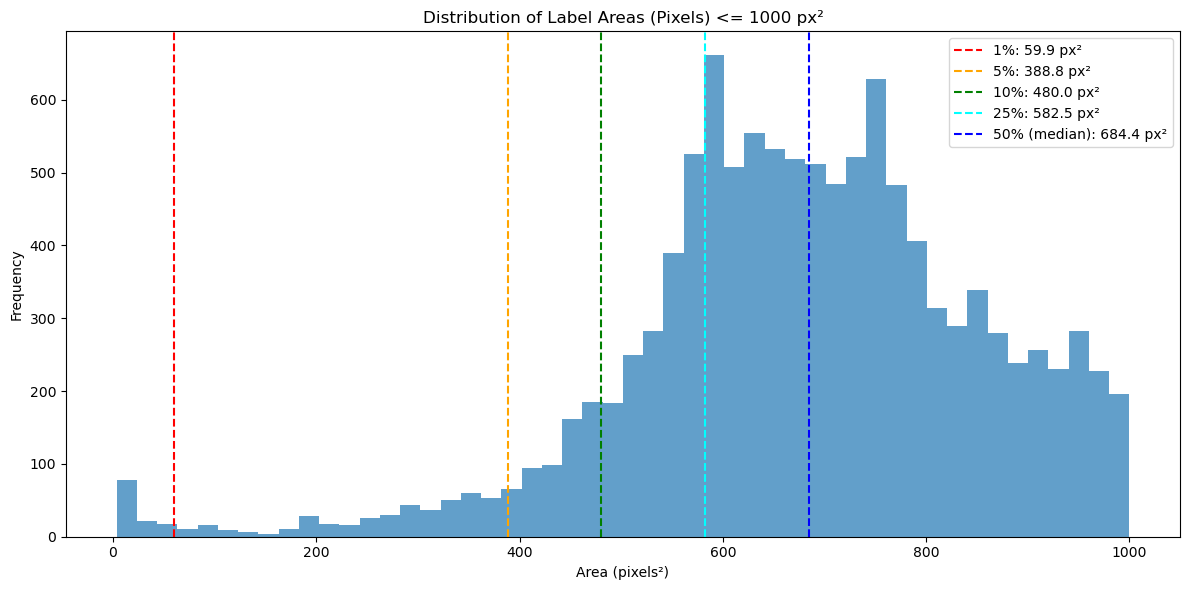

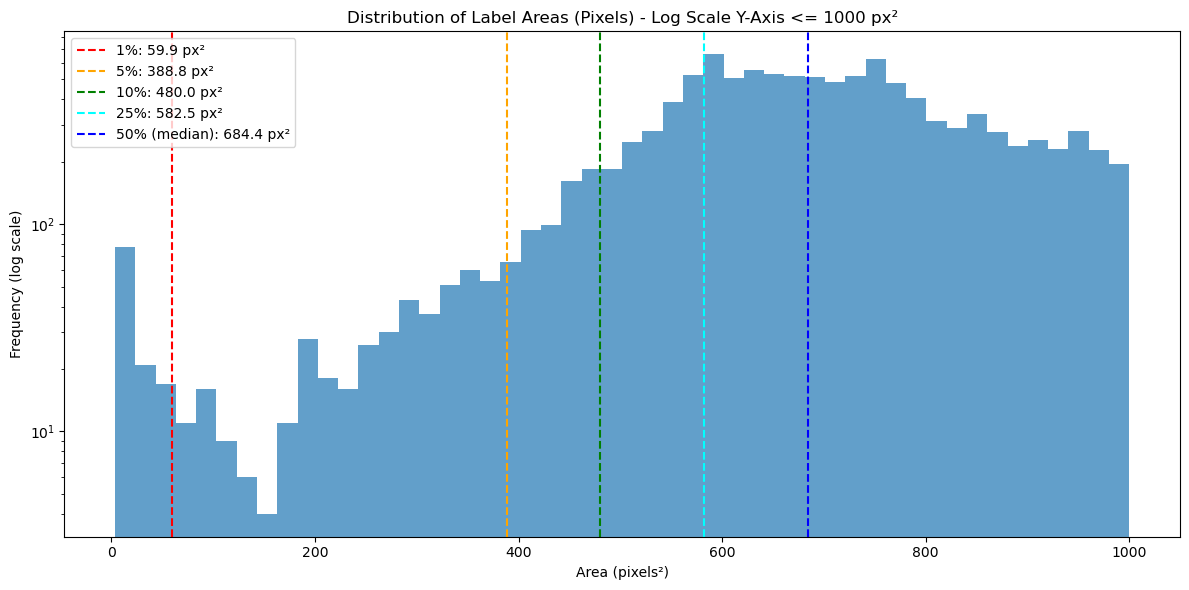

Label area statistics (in pixels²):
  - Count: 11235
  - Min: 3.5
  - Max: 1000.0
  - Mean: 679.2
  - Median: 684.4
  - 1%: 59.9
  - 5%: 388.8
  - 10%: 480.0
  - 25%: 582.5
  - 50% (median): 684.4


In [12]:
filterer.plot_area_histogram(max_area=1000)

Filtering to show only classes: 0 (alive) (13837/23083 labels, 59.9%)
Filtering to show only areas <= 1000 pixels² (8627/13837 labels, 62.3%)


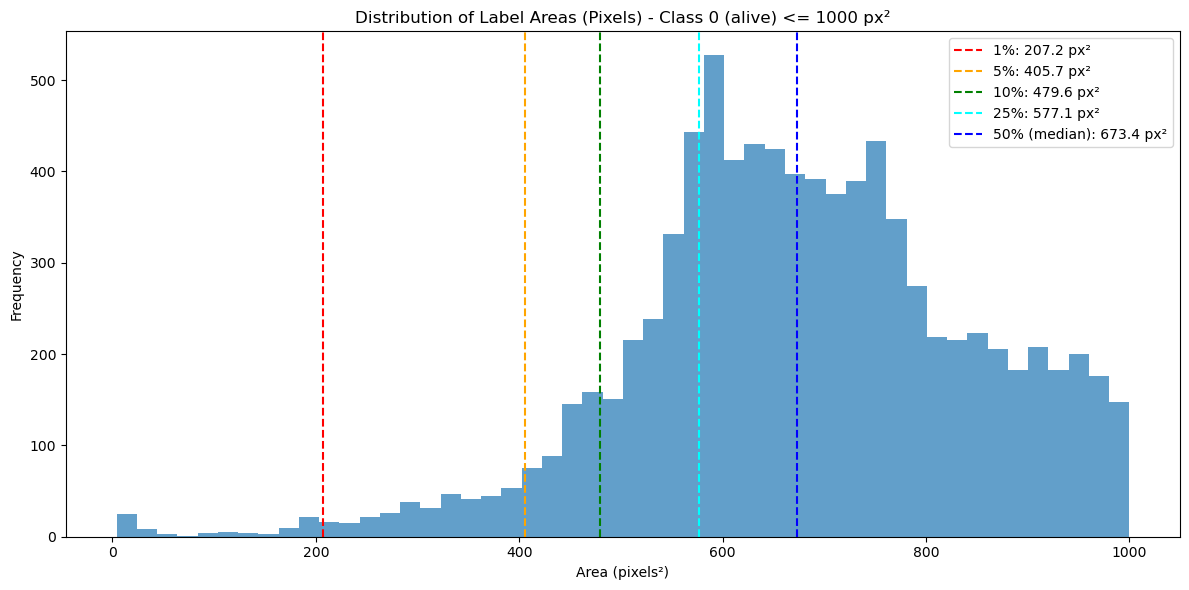

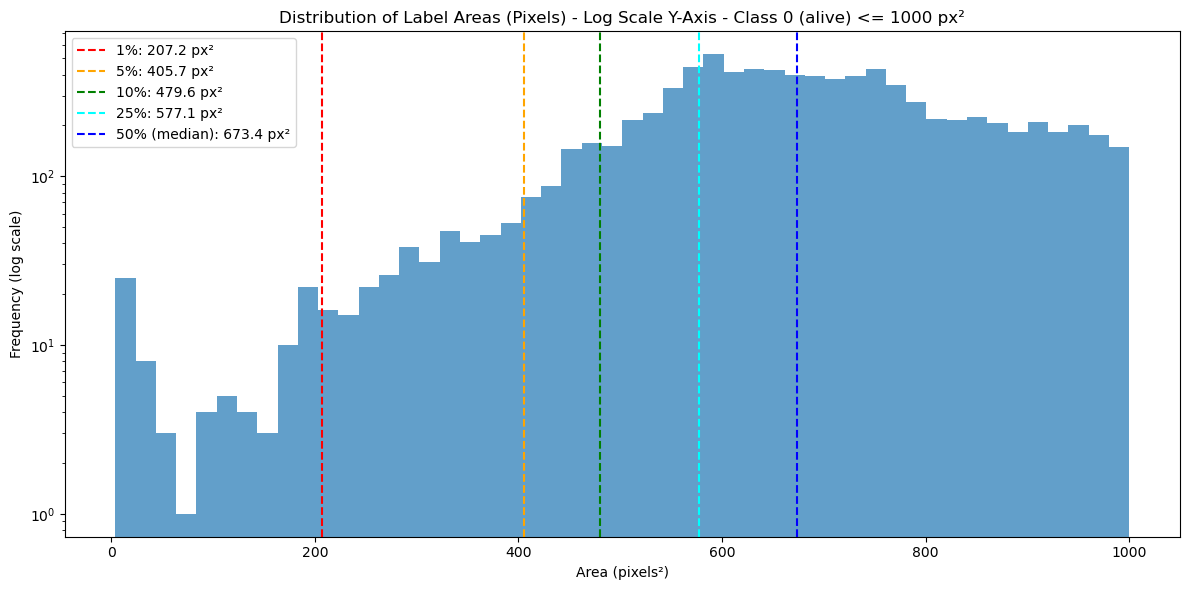

Label area statistics (in pixels²) for Class 0 (alive):
  - Count: 8627
  - Min: 4.0
  - Max: 1000.0
  - Mean: 676.8
  - Median: 673.4
  - 1%: 207.2
  - 5%: 405.7
  - 10%: 479.6
  - 25%: 577.1
  - 50% (median): 673.4


In [13]:
filterer.plot_area_histogram(class_ids=0, max_area=1000)

Filtering to show only classes: 1 (dead) (3116/23083 labels, 13.5%)
Filtering to show only areas <= 1000 pixels² (2473/3116 labels, 79.4%)


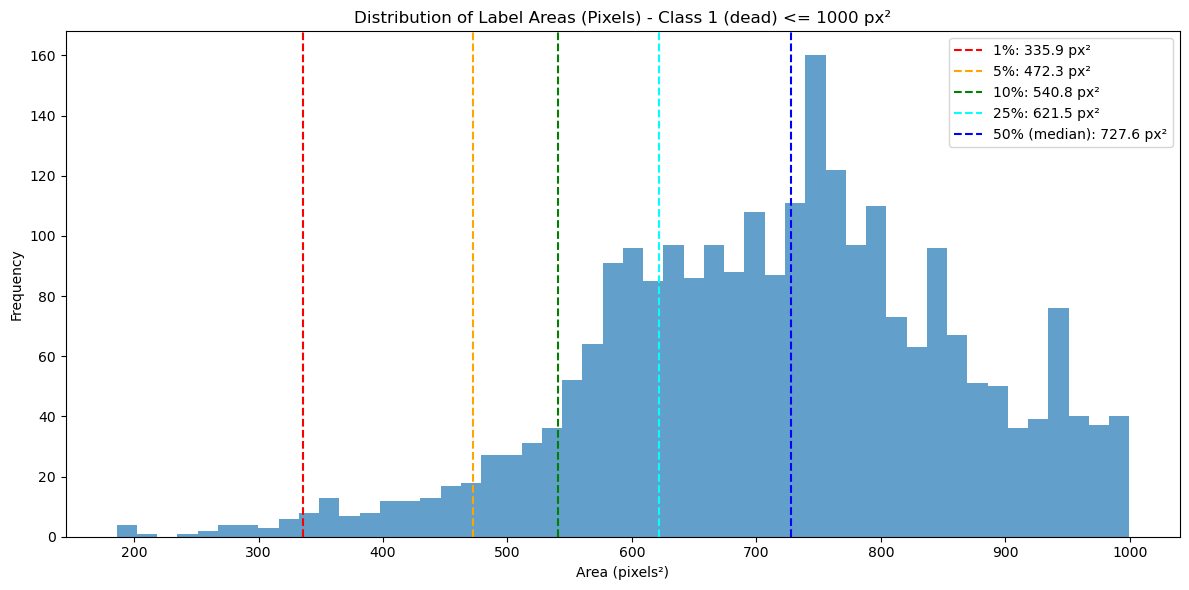

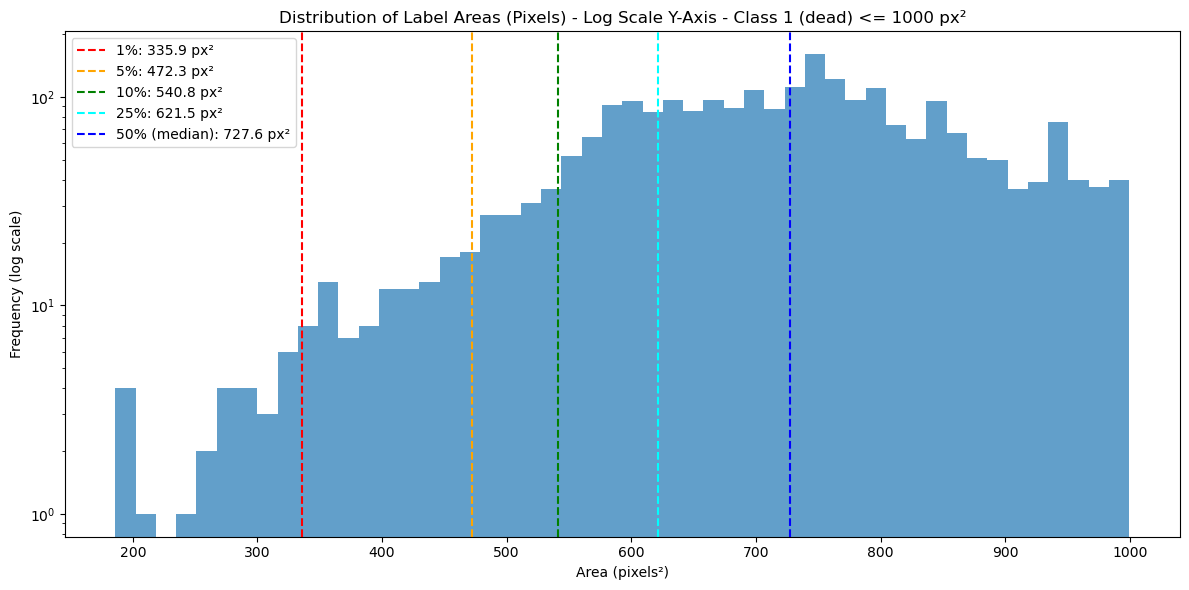

Label area statistics (in pixels²) for Class 1 (dead):
  - Count: 2473
  - Min: 185.9
  - Max: 999.6
  - Mean: 717.3
  - Median: 727.6
  - 1%: 335.9
  - 5%: 472.3
  - 10%: 540.8
  - 25%: 621.5
  - 50% (median): 727.6


In [14]:
filterer.plot_area_histogram(class_ids=1, max_area=1000)

Filtering to show only classes: 2 (mask_dead) (4387/23083 labels, 19.0%)
Filtering to show only areas <= 1000 pixels² (87/4387 labels, 2.0%)


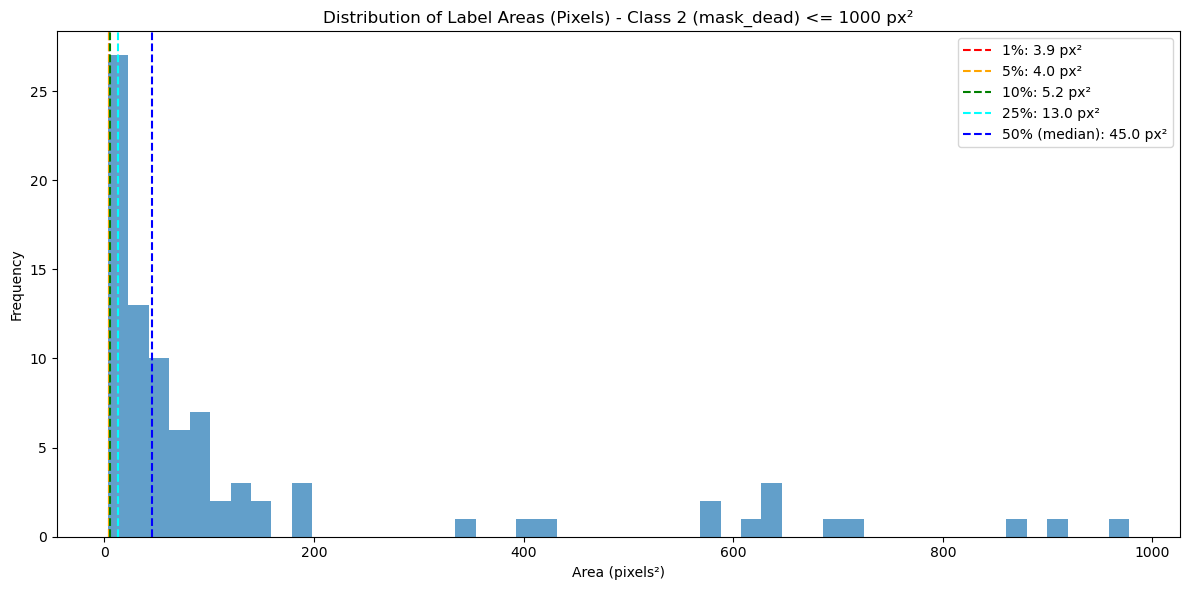

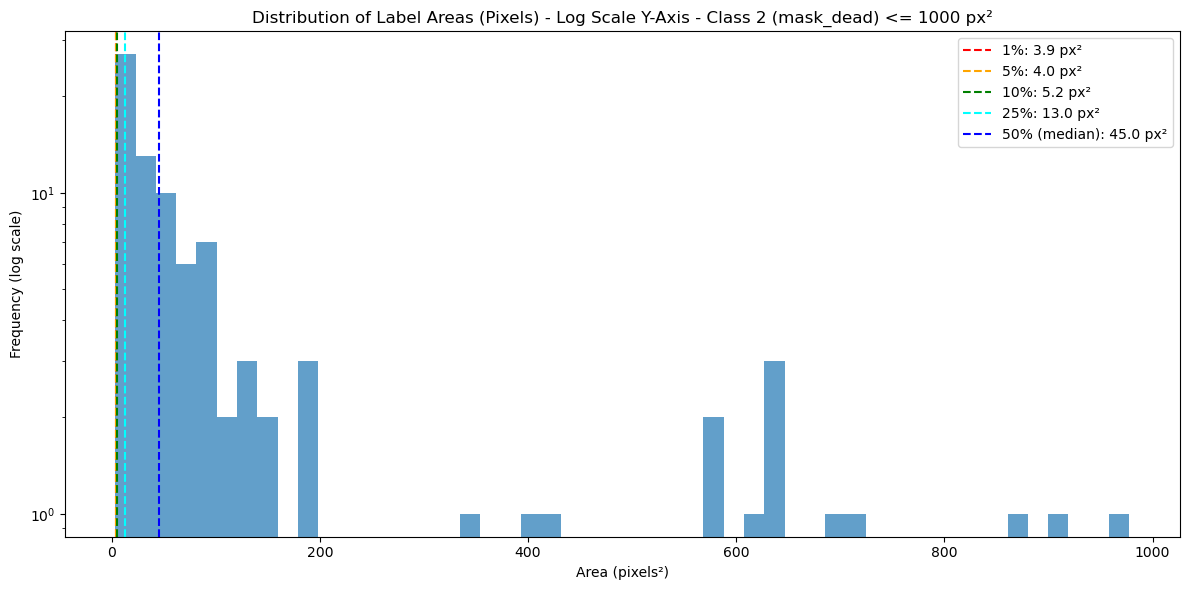

Label area statistics (in pixels²) for Class 2 (mask_dead):
  - Count: 87
  - Min: 3.5
  - Max: 977.6
  - Mean: 145.9
  - Median: 45.0
  - 1%: 3.9
  - 5%: 4.0
  - 10%: 5.2
  - 25%: 13.0
  - 50% (median): 45.0


In [15]:
filterer.plot_area_histogram(class_ids=2, max_area=1000)

Filtering to show only classes: 3 (mask_live) (1743/23083 labels, 7.6%)
Filtering to show only areas <= 1000 pixels² (48/1743 labels, 2.8%)


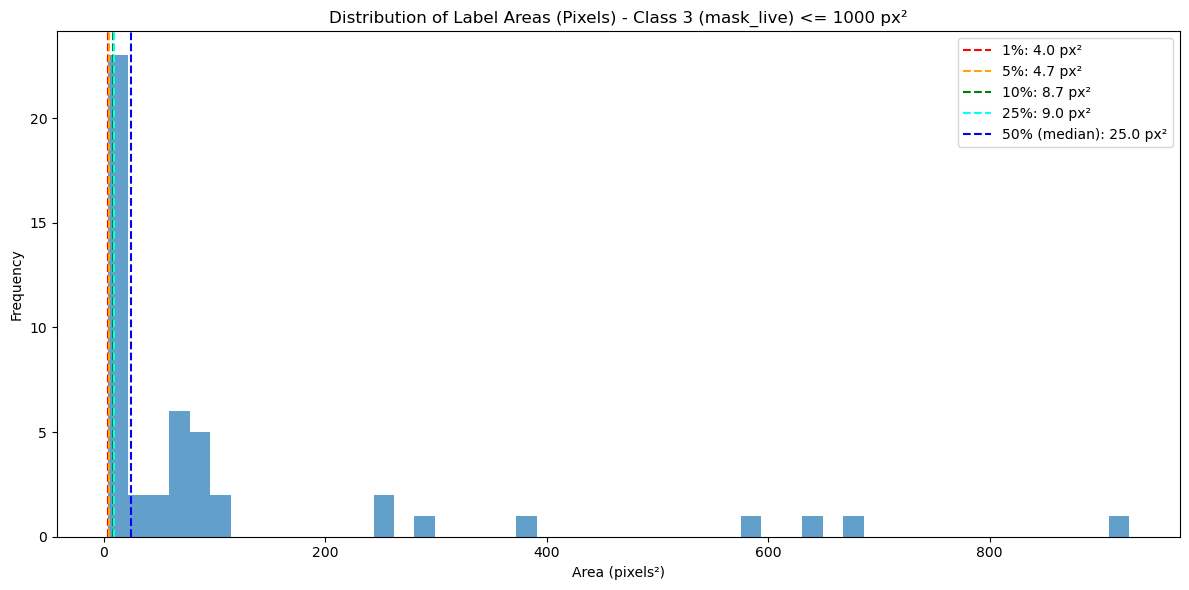

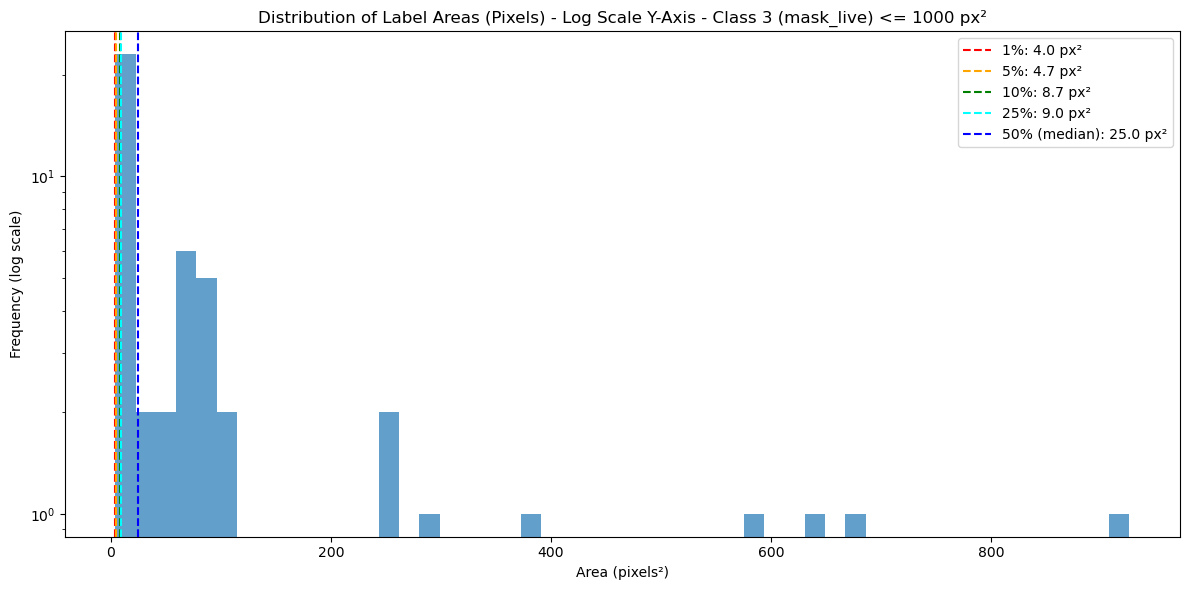

Label area statistics (in pixels²) for Class 3 (mask_live):
  - Count: 48
  - Min: 4.0
  - Max: 925.7
  - Mean: 113.5
  - Median: 25.0
  - 1%: 4.0
  - 5%: 4.7
  - 10%: 8.7
  - 25%: 9.0
  - 50% (median): 25.0


In [16]:
filterer.plot_area_histogram(class_ids=3, max_area=1000)

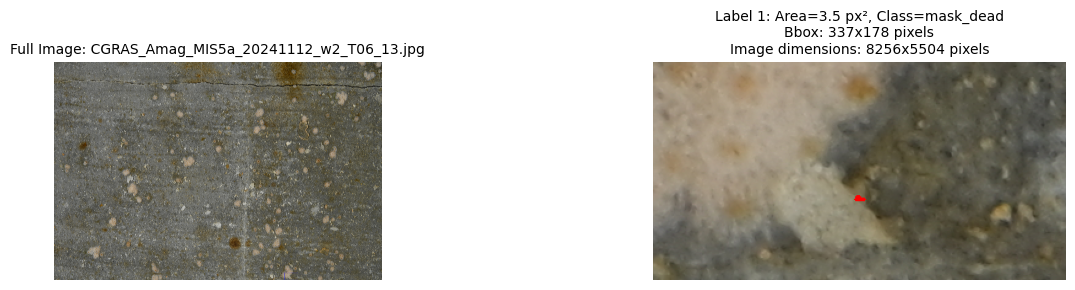

In [17]:
filterer.visualize_smallest_labels(n=1)

Found label with area 200.0 pixels² (target: 200 pixels²)
  - Difference: 0.0 pixels²
  - Class: alive
  - Image: /home/java/hpc-home/data/outputs/cvat2yolo/amag100/datasets/exported100/data/images/CGRAS_Amag_MIS5a_20241112_w2_T07_11.jpg
  - Label: /home/java/hpc-home/data/outputs/cvat2yolo/amag100/datasets/exported100/data/labels/CGRAS_Amag_MIS5a_20241112_w2_T07_11.txt


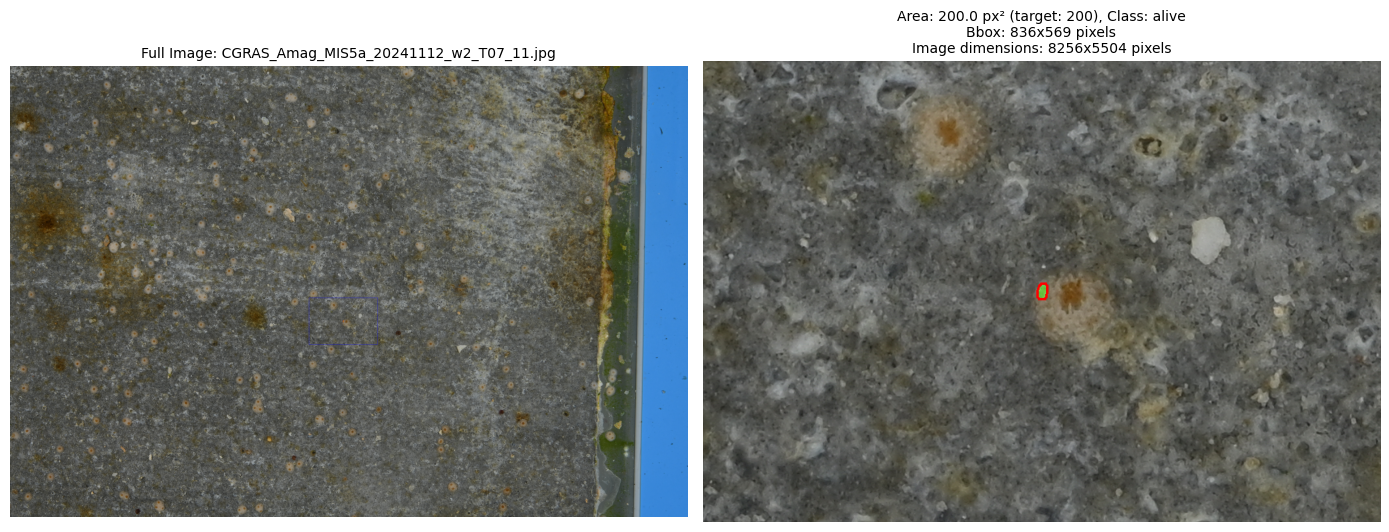

In [18]:
filterer.find_label_by_area(200)

The decision was made to filter polups at 175 pixels and corals at 200 pixels

In [19]:
filterer.filter_small_labels(
    min_pixel_area=[175, 175, 200, 200], 
    class_ids=[0, 1, 2, 3]
)

Filtering with the following thresholds:
  - Class 0 (Class 0): 175 pixels²
  - Class 1 (Class 1): 175 pixels²
  - Class 2 (Class 2): 200 pixels²
  - Class 3 (Class 3): 200 pixels²
Filtering 100 images in exported100...


Filtering exported100: 100%|██████████| 100/100 [00:22<00:00,  4.46files/s]

Dataset exported100 filtering complete:
  - Processed 100 images
  - Kept 22910 labels, removed 173 labels

Filtering complete:
  - Processed 100 images across 1 datasets
  - Kept 22910 labels, removed 173 labels

Per-class filtering statistics:
  - Class 0 (Class 0): threshold 175 pixels²
    - Processed: 13837
    - Kept: 13777
    - Removed: 60 (0.4%)
  - Class 1 (Class 1): threshold 175 pixels²
    - Processed: 3116
    - Kept: 3116
    - Removed: 0 (0.0%)
  - Class 2 (Class 2): threshold 200 pixels²
    - Processed: 4387
    - Kept: 4314
    - Removed: 73 (1.7%)
  - Class 3 (Class 3): threshold 200 pixels²
    - Processed: 1743
    - Kept: 1703
    - Removed: 40 (2.3%)

Filtered data saved to /media/java/RRAP03/data/outputs/filtered/amag100


Found 1 dataset paths in the YAML file
Loaded filtered data from /media/java/RRAP03/data/outputs/filtered/amag100/cgras_data.yaml
Analyzing 100 images in exported100...


Processing exported100: 100%|██████████| 100/100 [00:09<00:00, 10.96files/s]


Found 22910 labels in exported100
Total labels analyzed: 22910


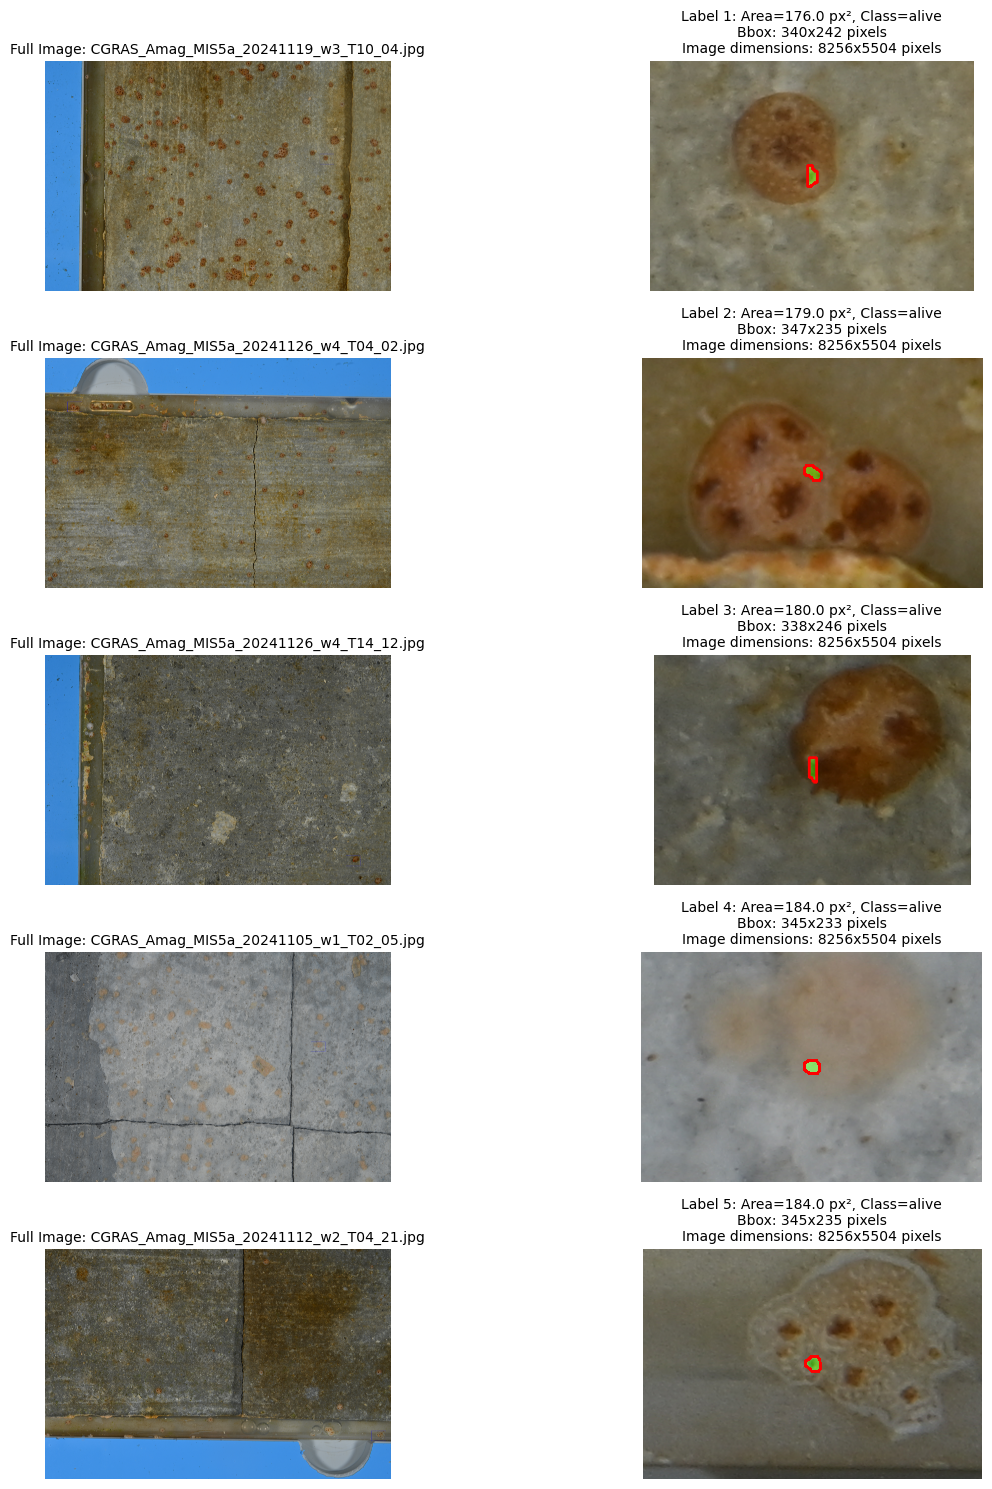

In [20]:
filterer.visualize_smallest_labels(n=5, use_filtered=True)

Found 1 dataset paths in the YAML file
Loaded filtered data from /media/java/RRAP03/data/outputs/filtered/amag100/cgras_data.yaml
Analyzing 100 images in exported100...


Processing exported100: 100%|██████████| 100/100 [00:08<00:00, 12.08files/s]

Found 22910 labels in exported100
Total labels analyzed: 22910
Filtering to show only areas <= 1000 pixels² (11062/22910 labels, 48.3%)


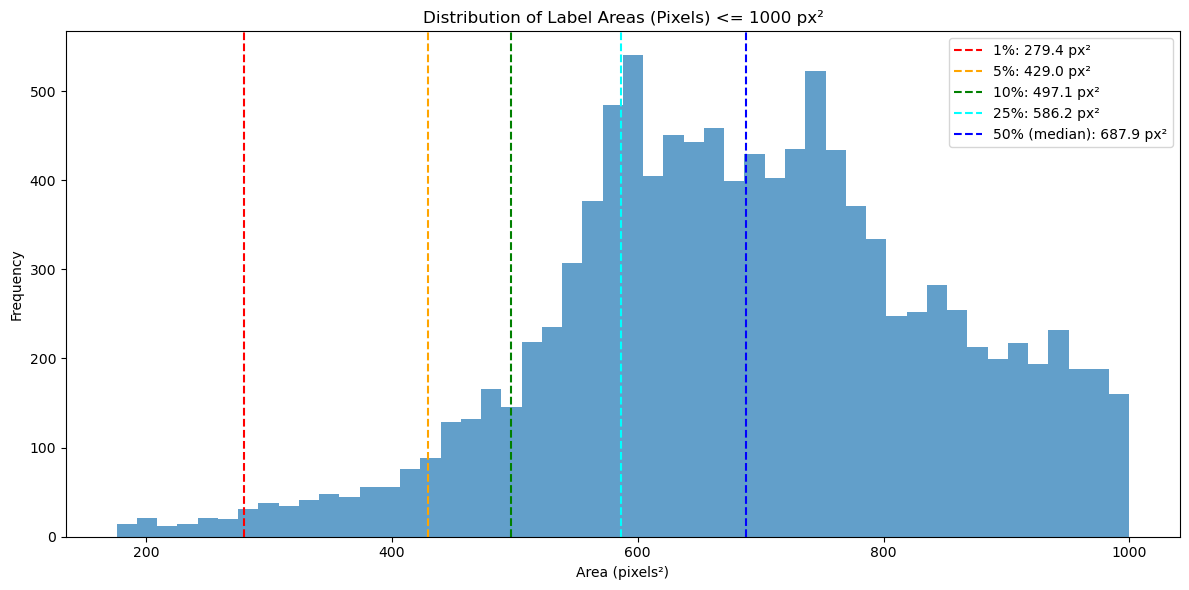

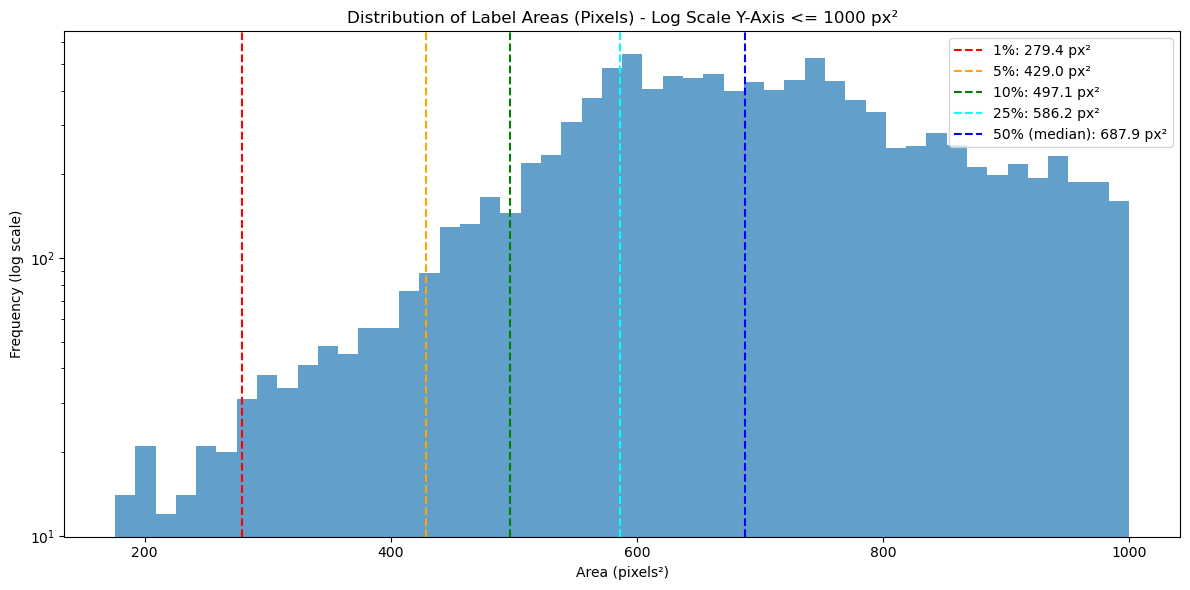

Label area statistics (in pixels²):
  - Count: 11062
  - Min: 176.0
  - Max: 1000.0
  - Mean: 689.0
  - Median: 687.9
  - 1%: 279.4
  - 5%: 429.0
  - 10%: 497.1
  - 25%: 586.2
  - 50% (median): 687.9


In [21]:
filterer.plot_area_histogram(max_area=1000, use_filtered=True)

# File Splitter
Split the data into train, val, test. This should have some options. It should be able to view the number of images per tile